<a href="https://colab.research.google.com/github/jhonsnow456/TF2.0_Course/blob/master/03_TF2_0_Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1

In [1]:
import tensorflow as tf

print(tf.__version__)

2.8.2


In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()

In [4]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [5]:
type(data)

sklearn.utils.Bunch

In [6]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [9]:
data.data.shape

(569, 30)

In [10]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [11]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [12]:
data.target.shape

(569,)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# method 1 : best practise

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (D, )), # input neuron
    tf.keras.layers.Dense(1, activation='sigmoid'), # output nuron with activation function
])

# mehod 2
# Dense(1, input_shape = (D, ), activation='sigmoid') : 
# 1 -> output neuron, input_shape -> input nueron, activation -> activation function for output neuron

# model = tf.keras.models.Sequential([
#     tf.keras.layers.Dense(1, input_shape = (D, ), activation='sigmoid'),
# ])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

r = model.fit(X_train, y_train, validation_data =(X_test, y_test), epochs=100)

print('Train Score: ', model.evaluate(X_train, y_train))
print('Test Score: ', model.evaluate(X_test, y_test))

Epoch 1/100
12/12 [==============================] - 0s 14ms/step - loss: 1.2699 - accuracy: 0.3123 - val_loss: 1.1995 - val_accuracy: 0.3138
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 1.1492 - accuracy: 0.3491 - val_loss: 1.0907 - val_accuracy: 0.3564
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 1.0388 - accuracy: 0.3911 - val_loss: 0.9891 - val_accuracy: 0.3777
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.9399 - accuracy: 0.4226 - val_loss: 0.8940 - val_accuracy: 0.4255
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.8473 - accuracy: 0.4698 - val_loss: 0.8097 - val_accuracy: 0.4840
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.7670 - accuracy: 0.5171 - val_loss: 0.7341 - val_accuracy: 0.5585
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6948 - accuracy: 0.5591 - val_loss: 0.6678 - val_accuracy: 0.6011
Epoch 8/100


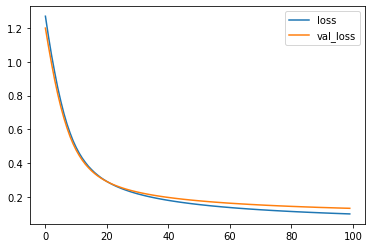

In [16]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')

plt.legend()

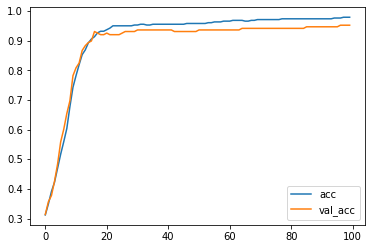

In [17]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')

plt.legend()

# Part 2: Prediction

In [18]:
P = model.predict(X_test)
print(P) # we are getting a 2D array of dimension N x 1

[[2.34559178e-03]
 [7.23606050e-02]
 [2.00206041e-03]
 [5.62858284e-02]
 [9.99723196e-01]
 [6.22481108e-04]
 [3.57615948e-03]
 [9.87927556e-01]
 [9.89353299e-01]
 [7.99262047e-01]
 [9.96050775e-01]
 [9.97148275e-01]
 [9.82133925e-01]
 [8.50416958e-01]
 [9.35316324e-01]
 [9.60993290e-01]
 [3.81405152e-05]
 [9.92694259e-01]
 [9.44307208e-01]
 [7.48017430e-03]
 [9.77195203e-01]
 [7.66396523e-04]
 [2.61703134e-03]
 [9.29152608e-01]
 [1.03116035e-03]
 [9.30426896e-01]
 [1.55231953e-02]
 [6.45408034e-03]
 [8.86852860e-01]
 [9.81045246e-01]
 [9.75648642e-01]
 [9.62258339e-01]
 [9.55206096e-01]
 [7.91379333e-01]
 [9.99323845e-01]
 [9.36332762e-01]
 [1.79850757e-02]
 [9.65617061e-01]
 [8.73612523e-01]
 [9.82402921e-01]
 [1.04248524e-03]
 [4.99987602e-03]
 [9.29268003e-01]
 [9.16197181e-01]
 [4.58241403e-01]
 [3.31807733e-02]
 [6.74518943e-01]
 [4.71163601e-01]
 [9.98440146e-01]
 [9.86906052e-01]
 [6.99028611e-01]
 [9.96779919e-01]
 [4.77274656e-01]
 [8.30733418e-01]
 [1.23177171e-02]
 [1.683118

In [19]:
import numpy as np

P = np.round(P).flatten()
print(P)

[0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1.
 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1.
 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1.
 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0.]


In [20]:
print('Manually calculated Accuracy: ', np.mean(y_test == P))
print('Evaluated Output: ', model.evaluate(X_test, y_test))

Manually calculated Accuracy:  0.9521276595744681
6/6 [==============================] - 0s 2ms/step - loss: 0.1324 - accuracy: 0.9521
Evaluated Output:  [0.1324198842048645, 0.9521276354789734]
